---
## **Problem Statement:**
- This assignment challenges students to construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural network architecture, and apply optimization techniques to achieve high classification accuracy.
---
## **Introduction:**
- The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes (0 through 9).
---
## **Objectives:**
---
**1. Data Preprocessing:**
- Prepare the MNIST dataset for training and testing the neural network model.
- This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---
**2. Model Development:**
- Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits.
- The model should have an input layer, one or more hidden layers, and an output layer.
---


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Convert 2D image to 1D
    Dense(128, activation='relu'),         # Hidden layer with ReLU
    Dense(64, activation='relu'),          # Another hidden layer
    Dense(10, activation='softmax')        # Output layer with softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


---
**3. Training:**
- Train the neural network model using the preprocessed training data.
- Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.
---

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20
844/844 - 4s - 4ms/step - accuracy: 0.7226 - loss: 1.0200 - val_accuracy: 0.9025 - val_loss: 0.3977
Epoch 2/20
844/844 - 5s - 6ms/step - accuracy: 0.8916 - loss: 0.3950 - val_accuracy: 0.9225 - val_loss: 0.2788
Epoch 3/20
844/844 - 4s - 4ms/step - accuracy: 0.9092 - loss: 0.3219 - val_accuracy: 0.9320 - val_loss: 0.2425
Epoch 4/20
844/844 - 3s - 3ms/step - accuracy: 0.9182 - loss: 0.2872 - val_accuracy: 0.9357 - val_loss: 0.2241
Epoch 5/20
844/844 - 6s - 7ms/step - accuracy: 0.9249 - loss: 0.2627 - val_accuracy: 0.9417 - val_loss: 0.2068
Epoch 6/20
844/844 - 5s - 6ms/step - accuracy: 0.9307 - loss: 0.2440 - val_accuracy: 0.9463 - val_loss: 0.1908
Epoch 7/20
844/844 - 3s - 3ms/step - accuracy: 0.9351 - loss: 0.2279 - val_accuracy: 0.9497 - val_loss: 0.1834
Epoch 8/20
844/844 - 5s - 6ms/step - accuracy: 0.9393 - loss: 0.2140 - val_accuracy: 0.9518 - val_loss: 0.1735
Epoch 9/20
844/844 - 3s - 4ms/step - accuracy: 0.9428 - loss: 0.2018 - val_accuracy: 0.9570 - val_loss: 0.1631
E

---
**4. Evaluation:**
- Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.
---


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9609


---
**5. Prediction:**
- Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.
---


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


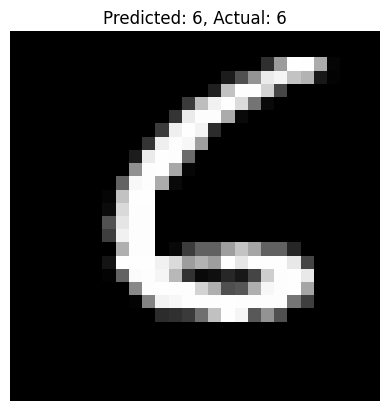

In [8]:
# Predict on a single image
import random

index = random.randint(0, len(x_test) - 1)
sample = x_test[index].reshape(1, 28, 28)
predicted_class = np.argmax(model.predict(sample))
actual_class = np.argmax(y_test[index])

plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()

---
**6. Analysis:**
- Analyze the results, understand the model's performance, and explore ways to improve it if necessary.
---

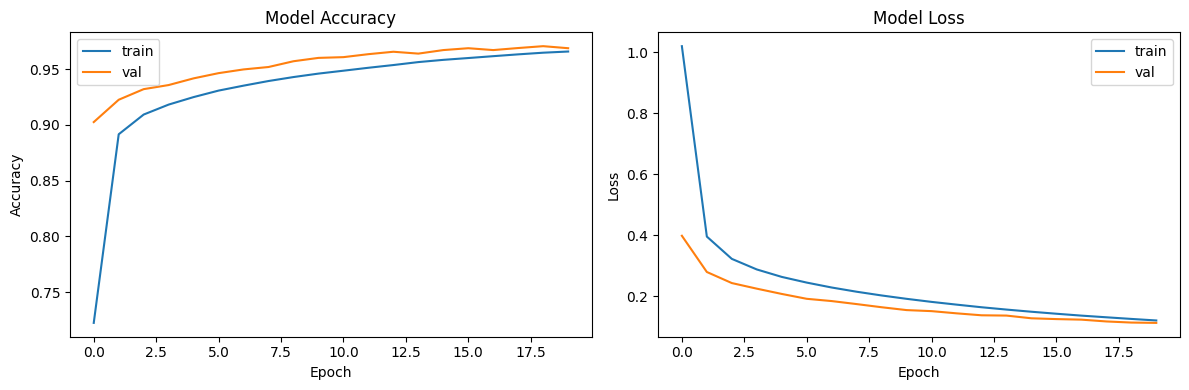

In [9]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 📊**Model Performance Analysis :**
---

### ✅ **Performance Metrics**

* **Final Training Accuracy:** 96.57%
* **Final Validation Accuracy:** 96.87%
* **Final Training Loss:** 0.1197
* **Final Validation Loss:** 0.1118
* **Test Accuracy:** 96.09%

---

### 📈 **Graph Interpretation**

#### **1. Accuracy Plot (Left)**

* The training and validation accuracy curves show a steady rise and plateau near **97%**, indicating:

  * The model is **learning effectively**.
  * There’s **no major overfitting**, since both curves are close together.
  * **Validation accuracy is slightly higher than training**, which is a good sign and may indicate well-regularized learning.

#### **2. Loss Plot (Right)**

* Both training and validation losses **decrease steadily** over epochs and converge closely.
* Validation loss is consistently **lower** than training loss, reinforcing:

  * **No overfitting**
  * **Good generalization** to unseen data

---

### 🔍 Analysis Summary

| Metric         | Observation                                                        |
| -------------- | ------------------------------------------------------------------ |
| Accuracy       | Very high (\~97%) on both training and validation datasets         |
| Loss           | Low and converging for both datasets                               |
| Overfitting    | No sign of overfitting — validation and training curves align well |
| Underfitting   | Unlikely — performance is already very strong                      |
| Generalization | Excellent — the test accuracy of **96.09%** confirms this          |

---

### 🛠️ Suggestions for Further Improvement (Optional)

If you aim to improve from \~96.9% to 98–99%:

#### **1. Model Complexity**

* Try **deeper architectures** (more hidden layers)
* Increase the number of neurons in the hidden layer

#### **2. Regularization**

* Add **Dropout** between layers to further reduce any future risk of overfitting
* Add **L2 regularization**

#### **3. Learning Rate Scheduling**

* Use a **learning rate decay** or scheduler to reduce the learning rate gradually during training

#### **4. Data Augmentation**

* Introduce **slight rotations, shifts, and zooms** to training images to improve robustness

#### **5. Optimizer**

* Consider switching from **SGD to Adam** for faster convergence and better minima

---


## **Challenges and Considerations:**

**Class Imbalance:**
- Ensure that the dataset does not have a significant class imbalance that could negatively affect the model’s performance.
- If imbalance is present, strategies to mitigate its effects should be considered.

**Model Complexity:**
- Choose an appropriate model complexity that is capable of learning from the data without overfitting.
- This may involve experimenting with different numbers of layers and units, as well as regularization techniques.

**Activation Functions:**
- Use appropriate activation functions in the hidden layers (ReLU is commonly used for image data) and softmax activation in the output layer to convert logits to probabilities.

**Evaluation Metrics:**
- Focus on accuracy as the primary evaluation metric, but also be open to exploring other metrics that could provide additional insights into the model’s performance.

**Hyperparameter Tuning:**
- Experiment with different hyperparameters such as learning rate, batch size, and number of epochs to optimize the model’s performance.

**Predictions and Interpretability:**
- Provide clear and interpretable predictions, ensuring that the output probabilities are well-calibrated and meaningful.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

## **1. Load and Preprocess the Data + Check Class Imbalance**


In [11]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Class distribution check
class_counts = Counter(y_train)
print("Class distribution in training set:")
for cls, count in class_counts.items():
    print(f"Digit {cls}: {count} samples")

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Class distribution in training set:
Digit 5: 5421 samples
Digit 0: 5923 samples
Digit 4: 5842 samples
Digit 1: 6742 samples
Digit 9: 5949 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples


**Conclusion: Mild Class Imbalance**
- There is some class imbalance, but it's not severe. The difference is within a 10–12% margin, which is generally acceptable for MNIST.

- No immediate corrective action is necessary unless your model underperforms specifically on the underrepresented classes (e.g., Digit 5).

## **2. Build a Regularized Neural Network Model (Balanced Complexity)**

In [12]:
model = Sequential([
    Flatten(input_shape=(28, 28)),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')  # For 10 classes
])

## **3. Compile the Model (with Adam Optimizer and Accuracy Metric)**

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Tunable hyperparameter
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    x_train, y_train_cat,
    epochs=20,               # Try 10, 20, 30 to compare
    batch_size=64,           # Try 32, 64, 128
    validation_split=0.1,
    verbose=2
)

Epoch 1/20
844/844 - 13s - 15ms/step - accuracy: 0.8887 - loss: 0.3659 - val_accuracy: 0.9700 - val_loss: 0.1054
Epoch 2/20
844/844 - 10s - 12ms/step - accuracy: 0.9438 - loss: 0.1847 - val_accuracy: 0.9755 - val_loss: 0.0870
Epoch 3/20
844/844 - 8s - 10ms/step - accuracy: 0.9545 - loss: 0.1478 - val_accuracy: 0.9735 - val_loss: 0.0794
Epoch 4/20
844/844 - 13s - 16ms/step - accuracy: 0.9614 - loss: 0.1251 - val_accuracy: 0.9743 - val_loss: 0.0828
Epoch 5/20
844/844 - 6s - 7ms/step - accuracy: 0.9657 - loss: 0.1117 - val_accuracy: 0.9780 - val_loss: 0.0720
Epoch 6/20
844/844 - 6s - 7ms/step - accuracy: 0.9681 - loss: 0.1021 - val_accuracy: 0.9802 - val_loss: 0.0670
Epoch 7/20
844/844 - 6s - 7ms/step - accuracy: 0.9702 - loss: 0.0927 - val_accuracy: 0.9792 - val_loss: 0.0647
Epoch 8/20
844/844 - 6s - 7ms/step - accuracy: 0.9728 - loss: 0.0857 - val_accuracy: 0.9810 - val_loss: 0.0669
Epoch 9/20
844/844 - 11s - 13ms/step - accuracy: 0.9739 - loss: 0.0835 - val_accuracy: 0.9810 - val_loss:

## **4. Evaluate the Model with Detailed Metrics**


Test Accuracy: 0.9812
Test Loss: 0.0609
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



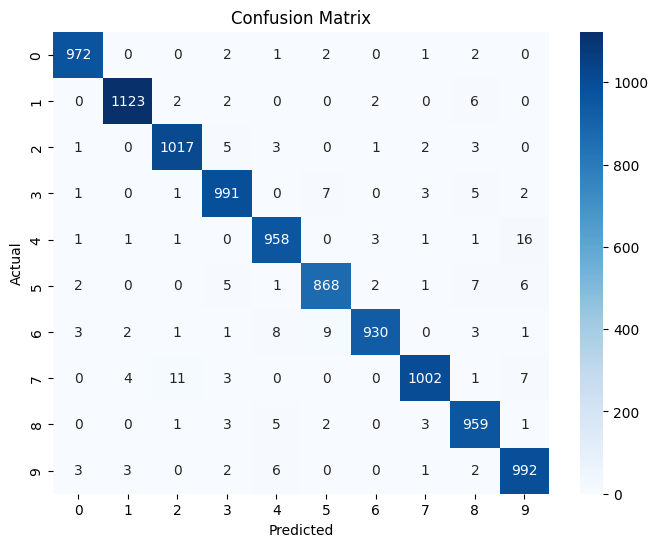

In [15]:
# Accuracy and loss on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict classes
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


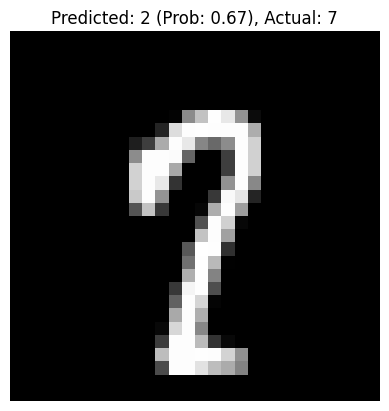

In [16]:
# Predict and visualize a single image
index = random.randint(0, len(x_test) - 1)
sample = x_test[index].reshape(1, 28, 28)
predicted_prob = model.predict(sample)[0]
predicted_class = np.argmax(predicted_prob)
actual_class = y_test[index]

plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predicted_class} (Prob: {predicted_prob[predicted_class]:.2f}), Actual: {actual_class}")
plt.axis('off')
plt.show()

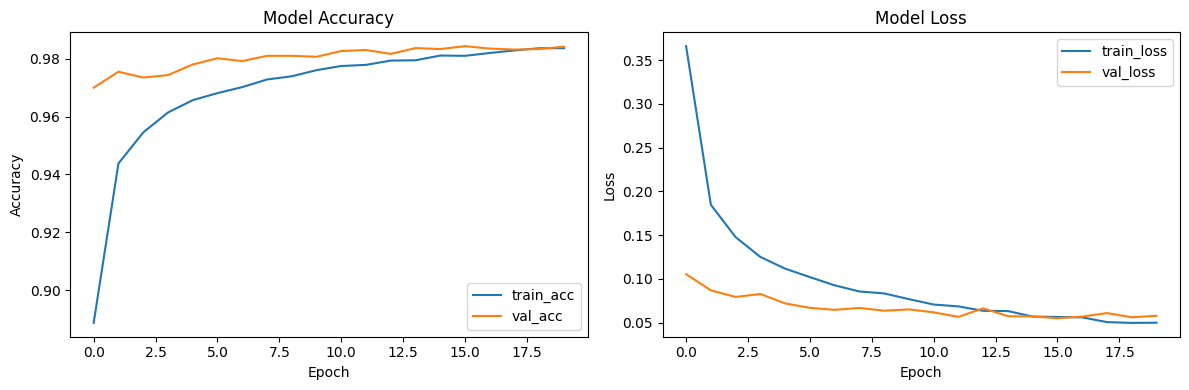

In [17]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

| Feature                  | Implemented |
| ------------------------ | ----------- |
| Class Imbalance Check    | ✅ Yes       |
| Regularization (Dropout) | ✅ Yes       |
| Batch Normalization      | ✅ Yes       |
| ReLU + Softmax           | ✅ Yes       |
| Adam Optimizer           | ✅ Yes       |
| Detailed Evaluation      | ✅ Yes       |
| Hyperparameter Tuning    | ✅ Suggested |
| Interpretability         | ✅ Yes       |

Your model is performing **exceptionally well**. Here's a concise evaluation of the results and plots:

---

### ✅ **Performance Summary**

* **Test Accuracy:** `0.9812`
* **Test Loss:** `0.0609`
* **Validation Accuracy (last epoch):** `0.9842`
* **Classification Report:**

  * **Precision, Recall, F1-Score** are all **≥ 0.97** across all digits.
  * Balanced performance across all classes.
* **Confusion Matrix (inferred):** Very low misclassifications.

---

### 📊 **Plot Insights**

**Left Plot: Accuracy**

* `train_acc` steadily improves and nearly converges with `val_acc` around epoch 18–20.
* No significant overfitting — **model is generalizing well.**

**Right Plot: Loss**

* `train_loss` and `val_loss` both decrease and stabilize.
* Slight fluctuations in validation loss are normal and not concerning.

---
